<a href="https://colab.research.google.com/github/Dawann-Bernardes/Pos_DataScience_PUCRIO/blob/main/MVP_DAWANN_BERNARDES_B_R_V_DE_AZEVEDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Definição do Problema**

## Descrição do problema:

Identificar oportunidades para incrementar a receita da Companhia.

Explorar os canais de vendas existentes na empresa, as categorias compradas para buscar maneiras de aprimorá-los ou expandir seu alcance. Com isso, fortalecer a posição da empresa no mercado e garantir um crescimento sustentável.

## Hipóteses:

*   Os KPIs são melhores na venda offline ou online?
*   Quais estratégias deve aplicar para incrementar a receita?
*   Qual é a melhor classificação de clientes para ações mais direcionadas e específicas que gerarão maior retorno? (Seria aplicado o modelo Não Supervisionado)



## Atributos do Dataset:

***Colunas:***

*   **master_id:** Número de cliente exclusivo
*   **order_channel:** Qual canal da plataforma de compras é usado (Android, iOS, Desktop, Mobile, Offline)
*   **last_order_channel:** O canal onde a última compra foi feita

*   **first_order_date:** A data da primeira compra feita pelo cliente

*   **last_order_date:** A data da última compra feita pelo cliente

*   **last_order_date_online:** A data da última compra feita pelo cliente na plataforma online

*   **last_order_date_offline:** A data da última compra feita pelo cliente na plataforma offline
*   **order_num_total_ever_online:** O número total de compras feitas pelo cliente na plataforma online
*   **order_num_total_ever_offline:** Número total de compras feitas pelo cliente offline
*   **customer_value_total_ever_offline:** O preço total pago pelo cliente por compras offline
*   **customer_value_total_ever_online:** O preço total pago pelo cliente por suas compras online
*   **interested_in_categories_12:** Lista de categorias em que o cliente comprou nos últimos 12 meses

# **Análise de dados**

## Importação Libraries e DataFrame

In [519]:
# Importação libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [520]:
# URL do Database
url = 'https://raw.githubusercontent.com/Dawann-Bernardes/Pos_DataScience_PUCRIO/refs/heads/main/flo_data_20k.csv'

# Columns que são datetime
dates_columns = [
    'first_order_date', 'last_order_date',
    'last_order_date_online', 'last_order_date_offline'
    ]

# Importação Database
purchase_list = pd.read_csv(filepath_or_buffer= url,
                            sep= ";",
                            parse_dates= dates_columns, # Lê como datetime, sem esse argumento, reconhece como Object
                            dayfirst=True
                            )

## Quantos atributos e instâncias existem?

Há 19.945 linhas e 11 colunas.

In [521]:
purchase_list.shape

(19945, 11)

Realmente a MasterID é único, o que siginifica que os dados estão por cliente e seu comportamento de compra em uma linha.

In [522]:
# Contagem distinta da column master_id
purchase_list['master_id'].nunique()

19945

A empresa possui 5 canais de Vendas:

**'Android App', 'Desktop', 'Mobile', 'Ios App', 'Offline'**

In [523]:
# Concatena as duas columns que possuem informação sobre o canal de venda da empresa, após isso realiza a operação para demonstrar somente os canais sem duplicadas.
pd.concat(
    [
        purchase_list['order_channel'],
        purchase_list['last_order_channel']
        ]
    ).unique()

array(['Android App', 'Desktop', 'Mobile', 'Ios App', 'Offline'],
      dtype=object)

## Quais são os tipos de dados dos atributos?

In [524]:
# DataType das columns
purchase_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  int64         
 8   order_num_total_ever_offline       19945 non-null  int64         
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

## Verifique as primeiras linhas do dataset. Algo chama a atenção?

Não há como saber em qual canal online o Clinte realizou a compra.

In [525]:
# Classifica o tipo do canal em Online e Offline
purchase_list['tipo_canal'] = np.where(purchase_list['order_channel'] == 'Offline', 'Offline', 'Online')

# Cria uma coluna que analisa o tempo que o cliente realiza pedido na empresa
purchase_list['leadtime_clientes'] = (purchase_list['last_order_date'] - purchase_list['first_order_date']).dt.days

purchase_list.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tipo_canal,leadtime_clientes
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,Online,119
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,Online,1469
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3,2,189.97,395.35,Online,366
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1,1,39.99,81.98,Online,11
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1,1,49.99,159.99,Online,582


## Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

### Todas as variáveis possuem outlier, como vemos pela diferença do 3º quartil com o máx onde ultrapassa o limite superior Q3 + (IQR * 1,5).
### Metade dos clientes offline só realizaram 1 compra e 75% dos clientes offline só realizaram até 2 compras.

In [526]:
# Calcula resumo estatístico com IQR
def statistc_summary(inferior: bool= False, superior: bool= False, df_entrada: pd.DataFrame= None) -> pd.DataFrame:
    '''Calcula resumo estatístico acrescenta iqr e outlier

    Parameters:
    inferior -- Distância do WHISKER inferior
    superior -- Distância do WHISKER superior

    Returns:
    df_saída -- Dataframe com resumo estatístico
    '''
    # Faz um resumo estatistico e transpoe
    df_saída = df_entrada.describe().T
    # Reordena as colunas
    df_saída = df_saída.reindex(columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    fator_iqr = 1.5
    terceiro_quartil = df_saída['75%']
    primeiro_quartil = df_saída['25%']

    if inferior:
      # Indice que está a coluna min
      idx_min = df_saída.columns.get_indexer_for(['min'])[0]

      limite_inferior = primeiro_quartil - (terceiro_quartil - primeiro_quartil)*fator_iqr
      df_saída.insert(idx_min, 'limite_inferior', limite_inferior)
      df_saída.insert(idx_min, 'possui_outlier_inferior?', df_saída['min'] < df_saída['limite_inferior'])

    if superior:
      # Indice que está a coluna max
      idx_max = df_saída.columns.get_indexer_for(['max'])[0] + 1

      limite_superior = terceiro_quartil + (terceiro_quartil - primeiro_quartil)*fator_iqr
      df_saída.insert(idx_max,'limite_superior', limite_superior)
      df_saída.insert(idx_max + 1, 'possui_outlier_superior?', df_saída['max'] > df_saída['limite_superior'])

    return df_saída

In [527]:
# Realiza a resumo estatítico das variáveis numéricas e desconsidera o resumo das variáveis datetime
statistc_summary = statistc_summary(df_entrada= purchase_list, superior= True, )[4:]

In [528]:
# Cor destaque para os outliers
def color(line: pd.Series) -> str:
  '''Estiliza o dataframe para destacar onde há outliers

  Parameters:
  line -- Onde será avaliado a existência de outliers

  Returns:
  background -- String com a configuração de estilo
  '''
  # Avalia se o Df possui a coluna possui_outlier_inferior para analisar se destacará ou não
  if line.index.isin(['possui_outlier_inferior?']).any():
    line['25%'] = line['possui_outlier_inferior?']
    line['min'] = line['possui_outlier_inferior?']
    line['limite_inferior'] = line['possui_outlier_inferior?']

  # Avalia se o Df possui a coluna possui_outlier_superior para analisar se destacará ou não
  if line.index.isin(['possui_outlier_superior?']).any():
    line['75%'] = line['possui_outlier_superior?']
    line['max'] = line['possui_outlier_superior?']
    line['limite_superior'] = line['possui_outlier_superior?']

  background = np.where(line == True, 'background: repeating-linear-gradient(130deg, white, white 10px, rgb(255,215,216) 10px, rgb(255,215,216) 20px); color: black; font-weight: bold', '')

  return background

In [529]:
# Resumo estatístico com destaque onde houve a análise de outlier
statistc_summary.style.apply(color, subset=['75%', 'max', 'limite_superior', 'possui_outlier_superior?'], axis= 1)

,count,mean,std,min,25%,50%,75%,max,limite_superior,possui_outlier_superior?
order_num_total_ever_online,19945.000000,3.110855,4.225647,1.000000,1.000000,2.000000,4.000000,200.000000,8.500000,True
order_num_total_ever_offline,19945.000000,1.913913,2.062880,1.000000,1.000000,1.000000,2.000000,109.000000,3.500000,True
customer_value_total_ever_offline,19945.000000,253.922597,301.532853,10.000000,99.990000,179.980000,319.970000,18119.140000,649.940000,True
customer_value_total_ever_online,19945.000000,497.321690,832.601886,12.990000,149.980000,286.460000,578.440000,45220.130000,1221.130000,True
leadtime_clientes,19945.000000,666.844472,522.126125,0.000000,353.000000,536.000000,766.000000,3034.000000,1385.500000,True


### Não há valores nulos e sem duplicadas

In [530]:
# Verifica se há coluna com valores nulos
purchase_list.isna().sum()

,0
master_id,0
order_channel,0
last_order_channel,0
first_order_date,0
last_order_date,0
last_order_date_online,0
last_order_date_offline,0
order_num_total_ever_online,0
order_num_total_ever_offline,0
customer_value_total_ever_offline,0


<Axes: >

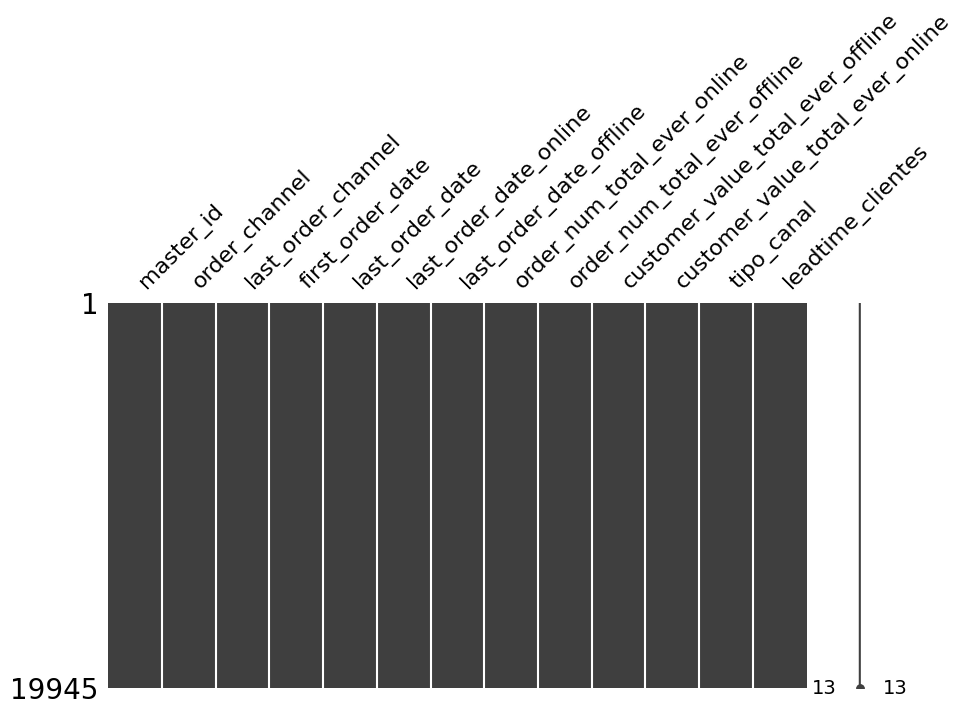

In [531]:
# Mostra graficamente se há nulo, se houver aparecerá uma linha em branco na respectiva barra da coluna indicada
purchase_sem_missing = purchase_list.copy()
ms.matrix(purchase_sem_missing, figsize= (10, 5))

In [532]:
# Verifica se há valores duplicados
purchase_list.duplicated().sum()

0

## Visualizações e Pré-Processamento

In [533]:
# Seleciona as colunas que possuem o tipo selecionado (int, float), servirá como base para plotagem dos gráficos e análises
coluna = purchase_list.select_dtypes(include= ['float', 'int']).columns

### Tratamento Outlier, para nossa clusterização é necessária para não pluir a padronização que iremos fazer antes de treinar o modelo.

In [534]:
def verifica_outliers(df: pd.DataFrame, coluna: str) -> pd.DataFrame:
  '''Realiza a identificação de Outliers

  Parameters:
  df -- DataFrame onde será analisado
  coluna -- As colunas que serão analisadas do df

  Returns:
  df_saida -- Dataframe com a coluna de análise dos outliers (1 = sim, 0 = não)
  '''
  df_entrada = df.copy()

  for i in coluna:
    first_q = df_entrada[i].quantile(0.25)
    thirt_q = df_entrada[i].quantile(0.75)
    iqr = thirt_q - first_q
    limite_inferior = first_q - (iqr * 1.5)
    limite_superior = thirt_q + (iqr * 1.5)
    df_entrada[f'Analise {i}'] = np.where(((df_entrada[i] < limite_inferior) |  (df_entrada[i] > limite_superior)), 1, 0)

  df_entrada[-5:]
  df_saida = df_entrada.copy()

  return df_saida

In [535]:
# Realiza tratativa dos outliers

purchase_list_sem_outlier = verifica_outliers(df= purchase_list, coluna= coluna)
purchase_list_sem_outlier['consolidado_outlier'] = purchase_list_sem_outlier.iloc[:, -5:].apply(np.sum, axis= 1)
purchase_list_sem_outlier.head(5)

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,tipo_canal,leadtime_clientes,Analise order_num_total_ever_online,Analise order_num_total_ever_offline,Analise customer_value_total_ever_offline,Analise customer_value_total_ever_online,Analise leadtime_clientes,consolidado_outlier
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,Online,119,0,0,0,0,0,0
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,Online,1469,1,0,0,1,1,3
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3,2,189.97,395.35,Online,366,0,0,0,0,0,0
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1,1,39.99,81.98,Online,11,0,0,0,0,0,0
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1,1,49.99,159.99,Online,582,0,0,0,0,0,0


Os outliers correspondem a 26% dos dados, iremos excluí-los

In [536]:
qtd_outlier = purchase_list_sem_outlier[purchase_list_sem_outlier['consolidado_outlier'] > 0].shape[0]
qtd_total = purchase_list_sem_outlier.shape[0]

qtd_outlier / qtd_total * 100

26.29731762346453

In [553]:
purchase_list_sem_outlier = purchase_list_sem_outlier[purchase_list_sem_outlier['consolidado_outlier'] == 0]
purchase_list_sem_outlier = purchase_list_sem_outlier.iloc[:, :-6]


KeyError: 'consolidado_outlier'

Com isso, nosso DataBase fica com 14700 linhas

In [554]:
purchase_list_sem_outlier.shape

(14700, 13)

### Análises Gráficas antes e depois do Pré-Processamento dos Outliers

In [538]:
# Cores para os gráficos
Paleta_cor = ['#13293D', '#006494', '#247BA0', '#1B98E0']

### Dispersão

In [556]:
def graf_dispersao(coluna: pd.Series, tipo_graf: str, df: pd.DataFrame):
  '''Cria gáficos de dispersao de acordo com a escolha do usuário

  Parameters:
  coluna -- Valores que usará para criar os gráficos
  tipo_graf -- Qual tipo de gráfico será criado (hist, box, violin)
  df -- DataFrame que será analisado

  Returns:
  None
  '''
  # Calcula quantidade de colunas
  ncol = len(coluna)

  # Cria figura de acordo com o tamanho das colunas
  fig, axes = plt.subplots(nrows= 1, ncols= ncol, figsize= (30, 10))

  # Cria os gáficos baseado na escolha do usuário
  for i in range(0, ncol):
    data = df[coluna[i]]
    valor_max = data.max()

  # Cria um histograma
    if tipo_graf == 'hist':
      axes[i].hist(data)
      axes[i].set_title(coluna[i])

  # Cria um BoxPlot
    elif tipo_graf == 'box':
      axes[i].boxplot(data)
      axes[i].set_title(coluna[i])

  # Cria um Violin
    elif tipo_graf == 'violin':
      axes[i].violinplot(data)
      axes[i].set_title(coluna[i])

  plt.show()

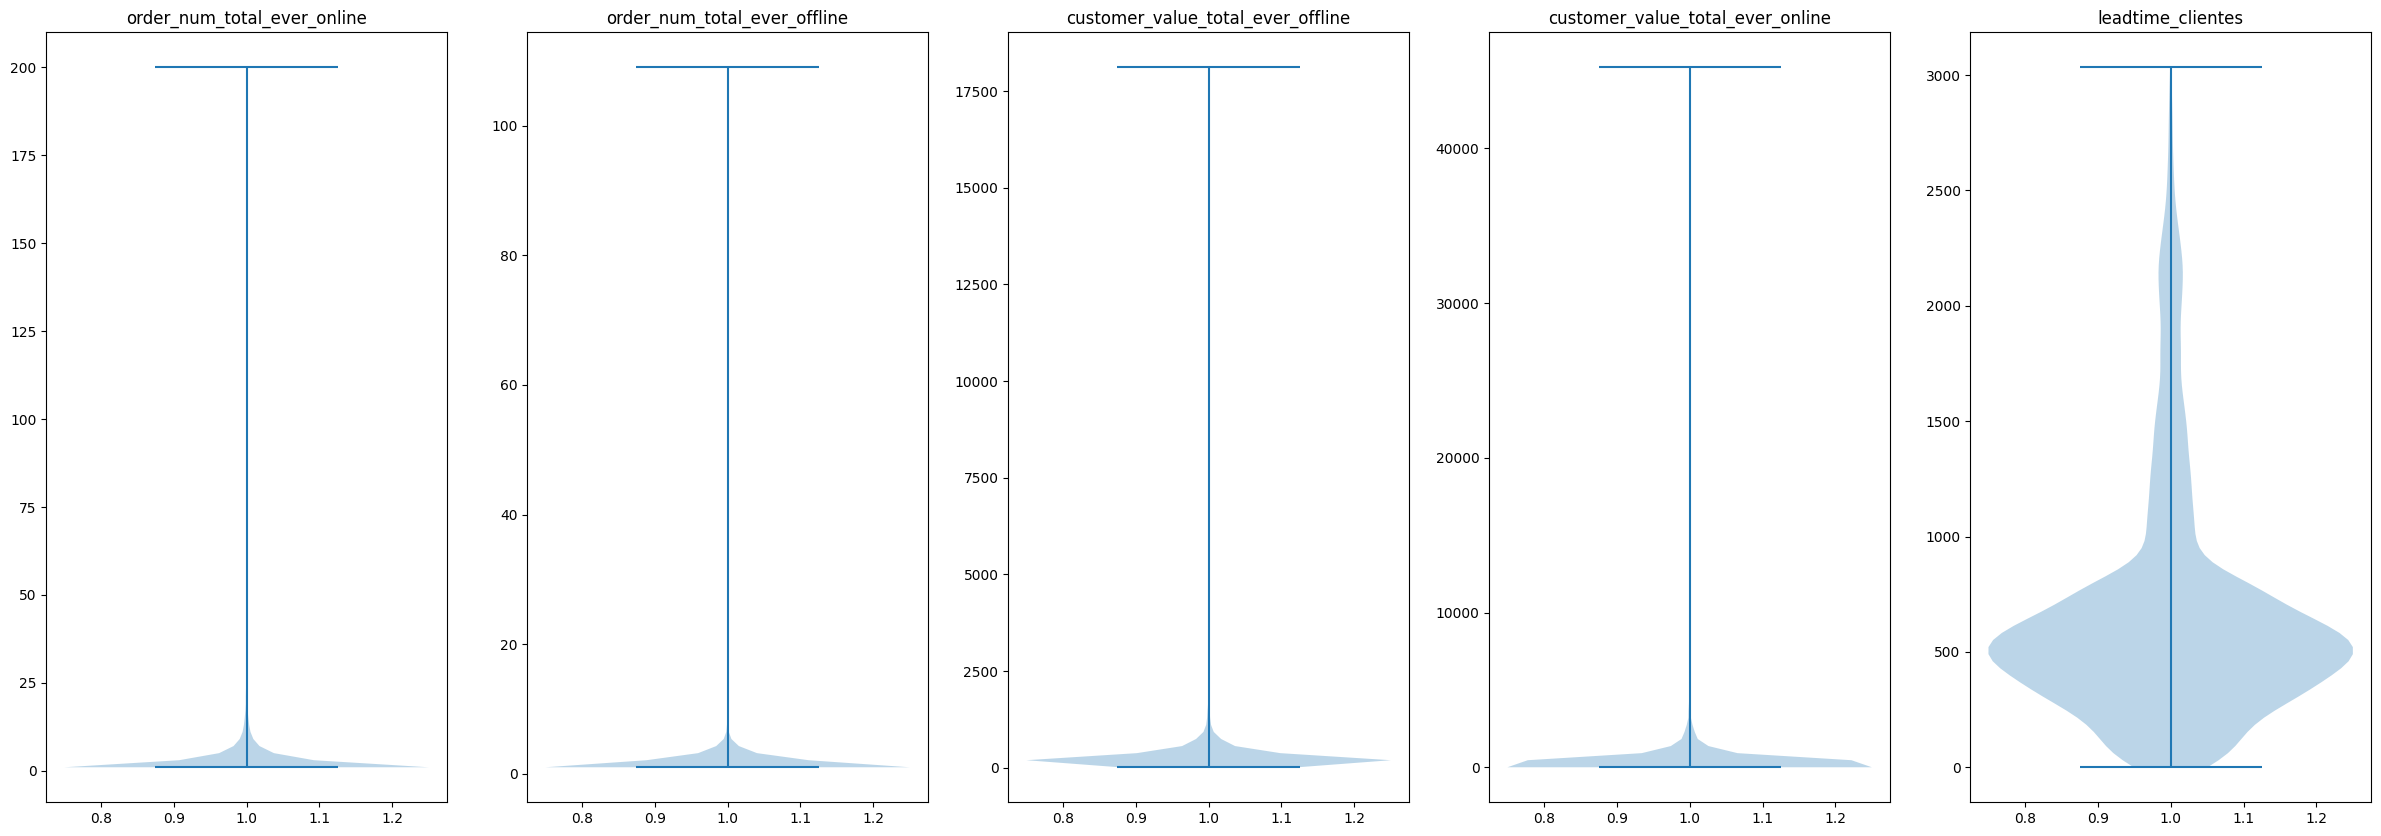

In [557]:
# Plota gráfico Violino Antes
graf_dispersao(coluna= coluna, tipo_graf= 'violin', df= purchase_list)

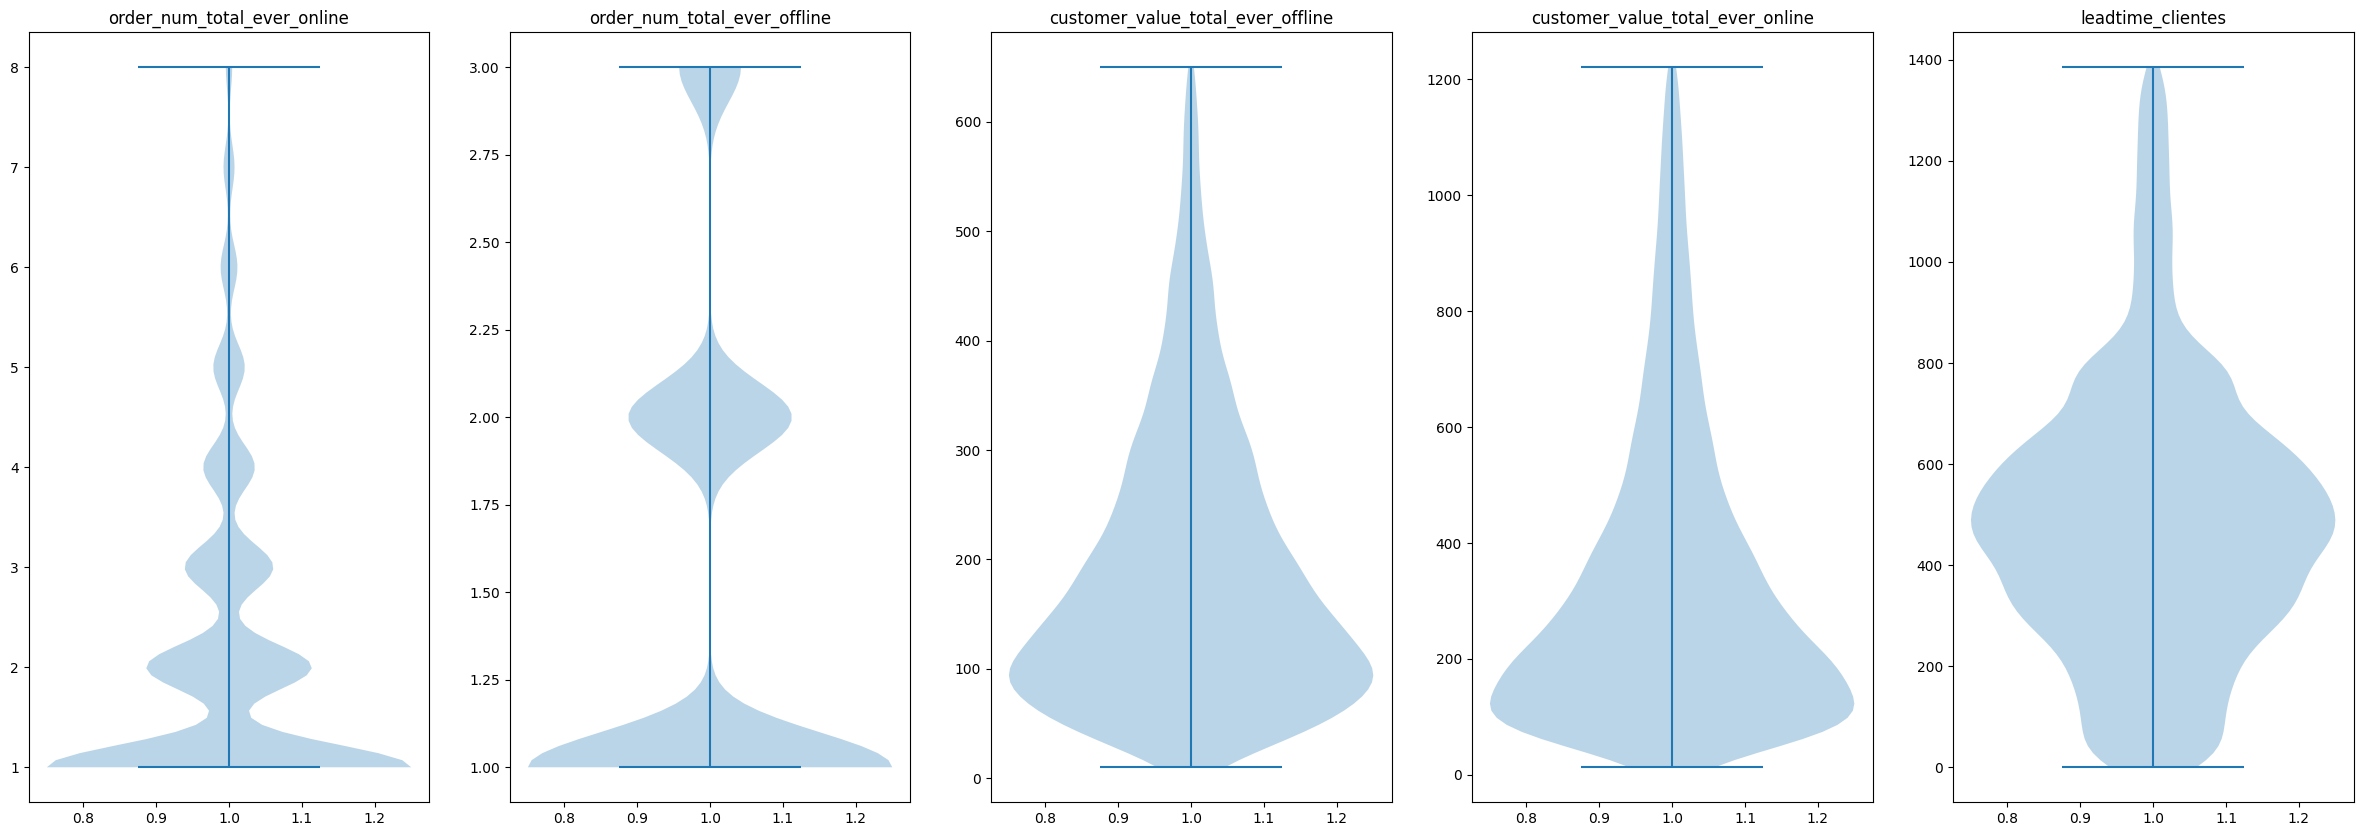

In [558]:
# Plota gráfico Violino Depois
graf_dispersao(coluna= coluna, tipo_graf= 'violin', df= purchase_list_sem_outlier)

Vemos aqui que a distribuição dos dados melhorou comparado ao Dataset com outlier e conseguimos ver melhor o comportamentos dos demais dados que possuem maior significancia.

As distribuições não se assemelham à uma normal, exceto a do leadtime de clintes, mas o nosso algoritmo não seguirá essa premissa, pois ele funcionará normalmente sem a normalização

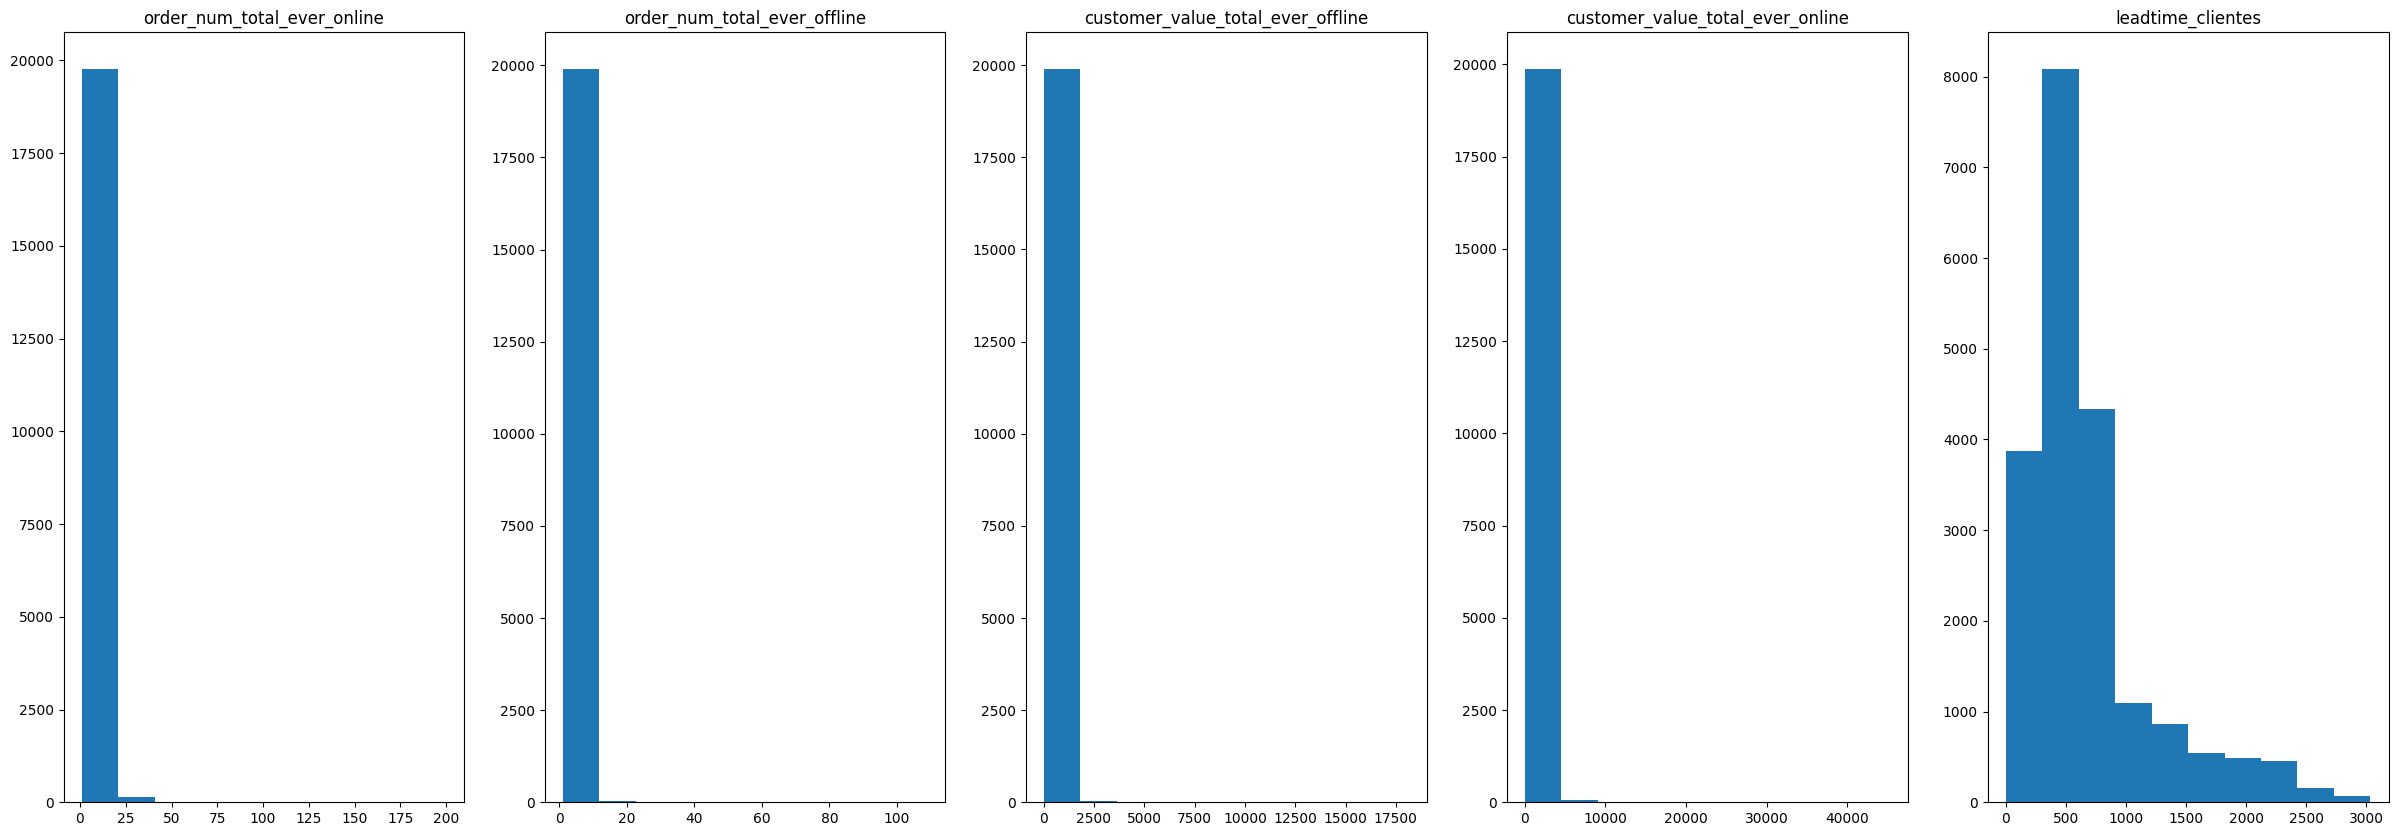

In [559]:
# Plota gráfico Histograma Antes
graf_dispersao(coluna= coluna, tipo_graf= 'hist', df= purchase_list)

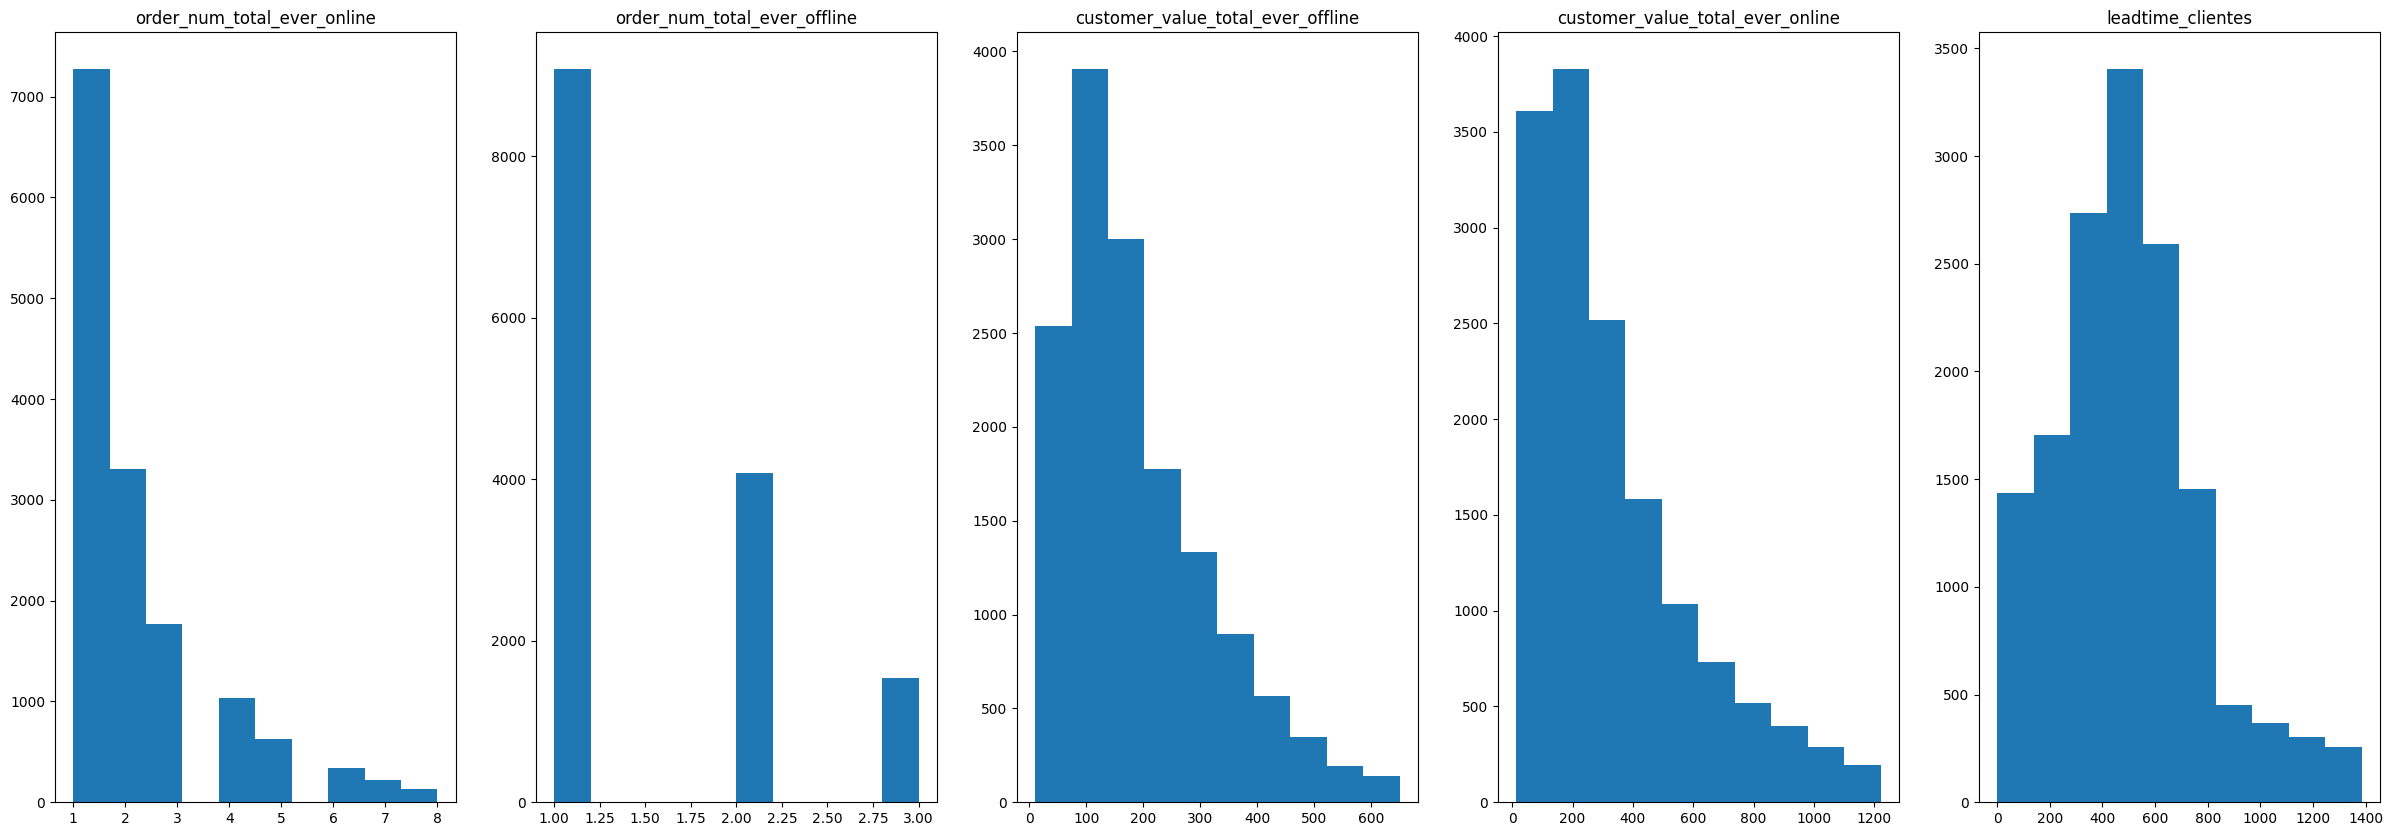

In [560]:
# Plota gráfico Histograma Depois
graf_dispersao(coluna= coluna, tipo_graf= 'hist', df= purchase_list_sem_outlier)

Vemos aqui que a distribuição dos dados melhorou comparado ao Dataset com outlier e conseguimos ver melhor o comportamentos dos demais dados que possuem maior significancia.

As distribuições não se assemelham à uma normal, exceto a do leadtime de clintes, mas o nosso algoritmo não seguirá essa premissa, pois ele funcionará normalmente sem a normalização

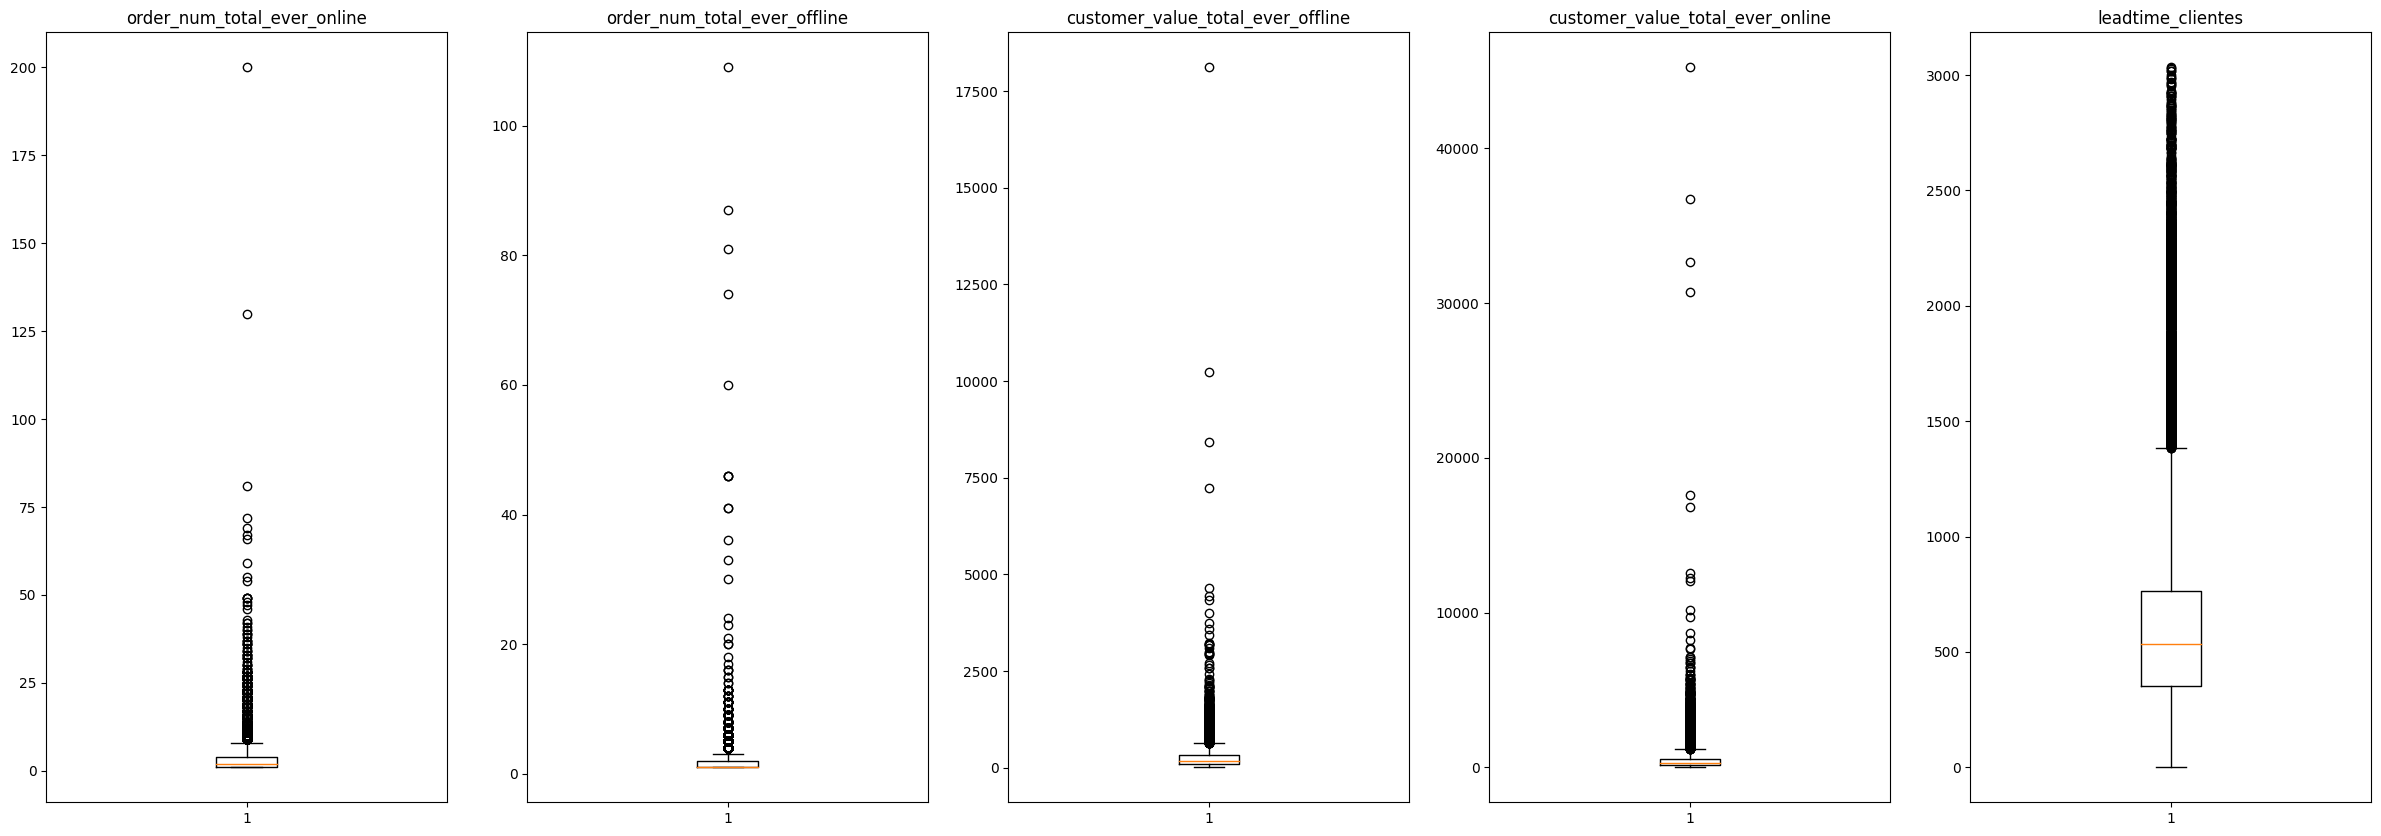

In [563]:
# Plota gráfico BoxPlot
graf_dispersao(coluna= coluna, tipo_graf= 'box', df= purchase_list)

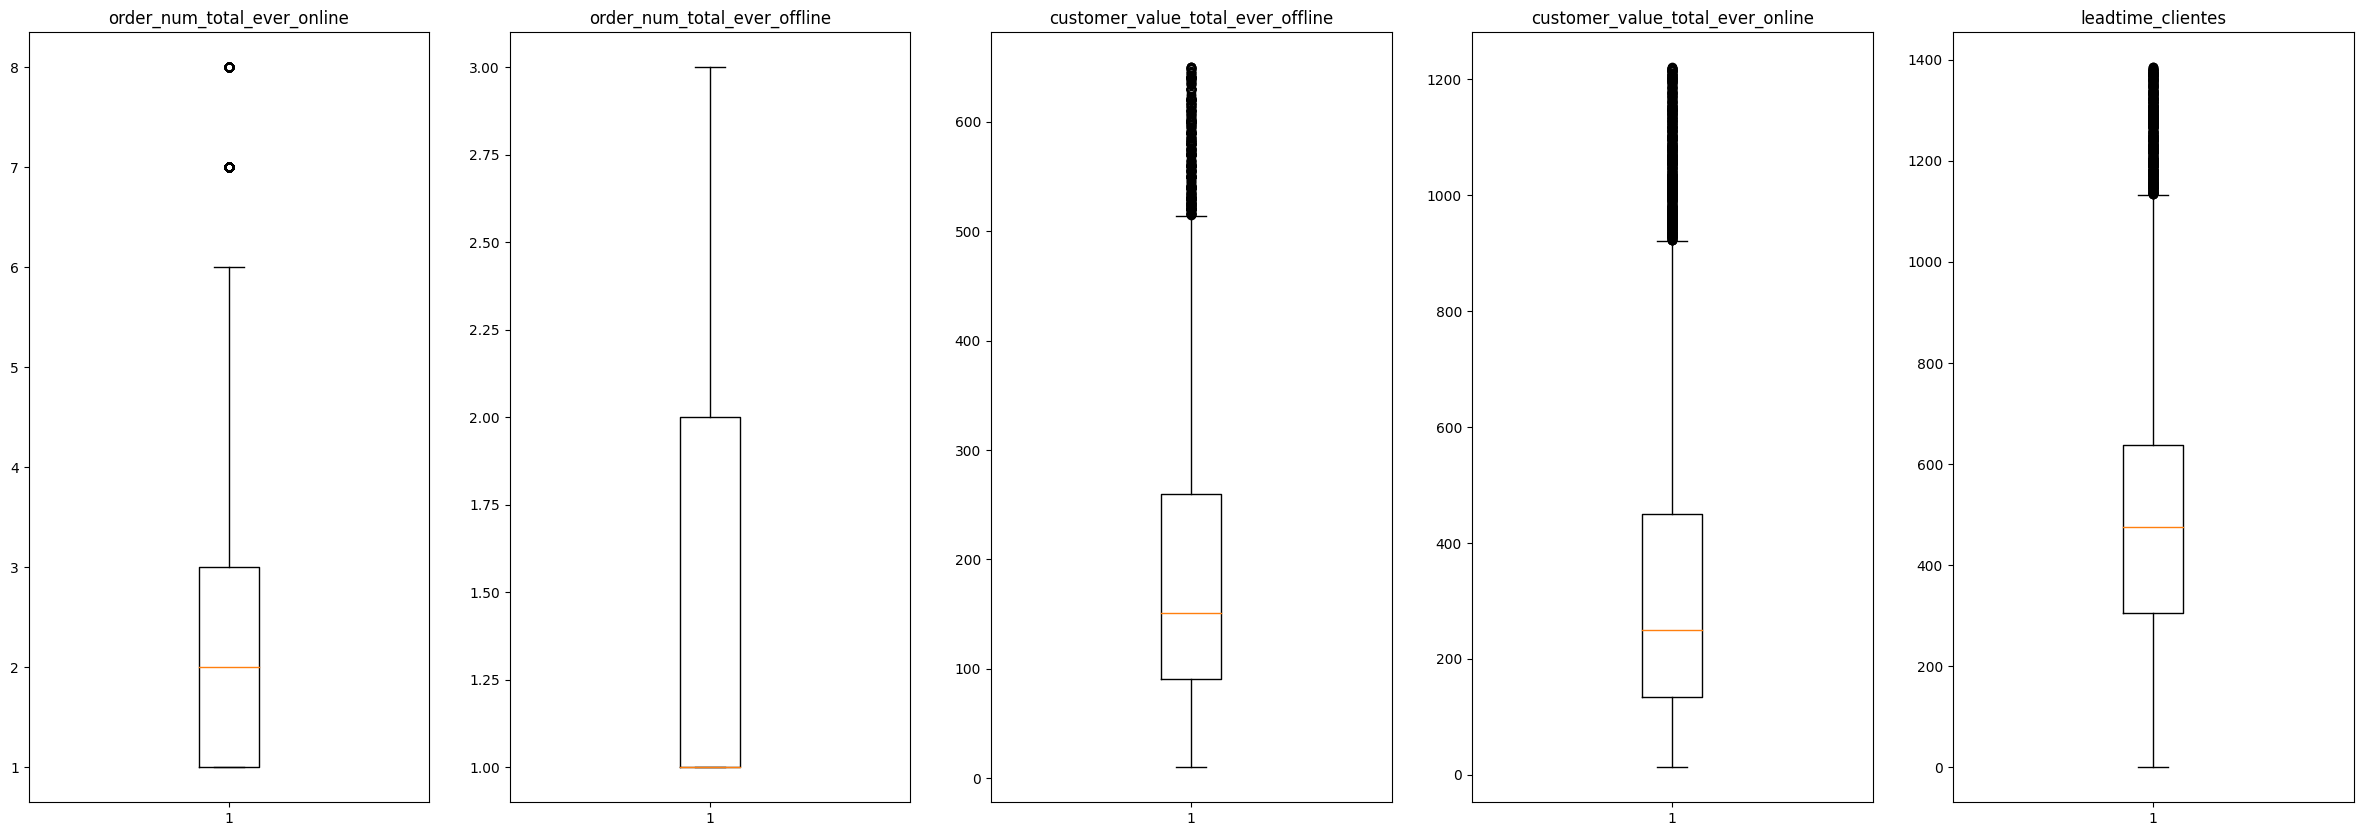

In [564]:
# Plota gráfico BoxPlot
graf_dispersao(coluna= coluna, tipo_graf= 'box', df= purchase_list_sem_outlier)

Vimos que melhorou a visualização da distribuição dos dados, mas mesmo assim ficaram alguns outliers que não foram identificados conforme nossa premissa, mas consideraremos para não prejudicar no volume dos dados

### Correlação

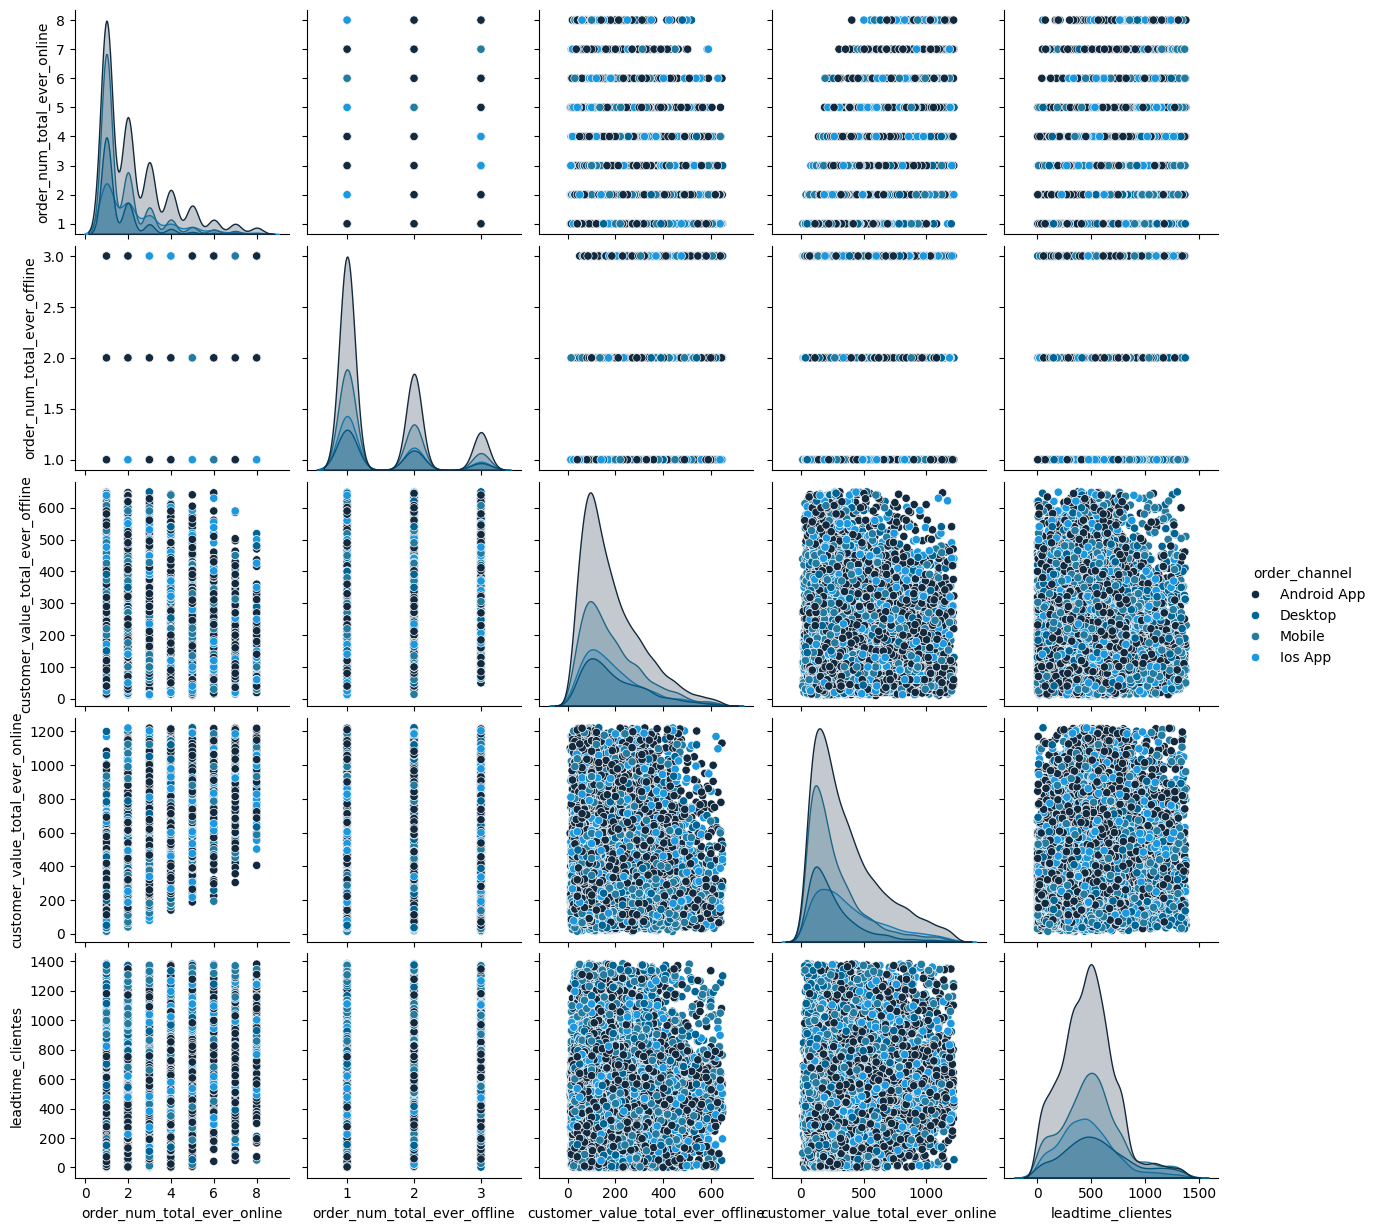

In [565]:
# Plota gráfico de dispesão correlaciona as variáveis por canal de venda
sns.pairplot(purchase_list_sem_outlier, hue= 'order_channel', palette= Paleta_cor)

<Axes: >

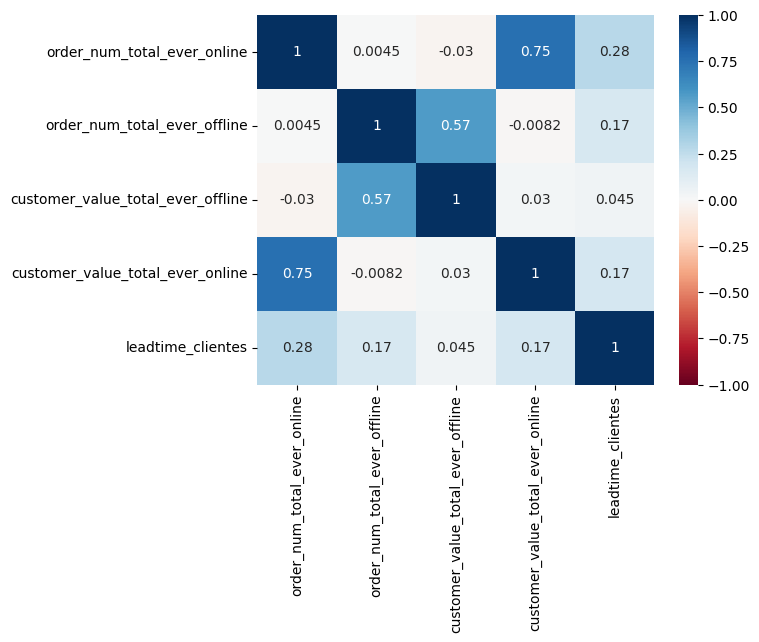

In [573]:
# Plota gráfico de calor com o valor da correlação das variáveis
sns.heatmap(purchase_list_sem_outlier[coluna].corr(), cmap='RdBu', annot= True, vmin=-1, vmax= 1)

Análise das correlações entre as variáveis, onde vimos que há uma correlação forte positva entre o tempo que o cliente fica na empresa com a quantidade de pedidos offline, e entre a quantidade de pedidos com o valor do pedido.

Mas não há uma distinção clara do canal, o que dificutará nosso algoritmo a clusterizar os clientes utilizando as variáveis quantitivas com o canal que o cliente compra. O Valores quantitativos não sofrem influência do canal.

### Variável Categórica (Canal de Venda)

In [598]:
def grafico_categorico_canal(x: pd.Series, y: pd.DataFrame, rotulo_y: list):
  '''Cria gáficos de barra de acordo com a categoria que for da escolha do usuário

  Parameters:
  x -- Valores que usará para criar os gráficos no eixo x
  y -- Valores que usará para criar os gráficos no eixo y

  Returns:
  None
  '''
  # Separa o nome das colunas do df
  try:
    coluna = y.columns
  except:
    coluna = y.index

  # Verifica a quantidade de colunas
  ncol = len(coluna)
  # Cria a figura
  fig, ax = plt.subplots(nrows= 1, ncols= ncol, figsize= (30, 10))

  # Checa a se a quantidade de colunas é 1
  if ncol == 1:
      ax = [ax]

  for i in range(0, ncol):
    data = coluna[i]
    df = y.sort_values(by= [data], ascending= False)
    x = df.index
    valores = df[data]

    if valores.max() > 1e6:
      ax[i].bar(x, valores/1e6, color= Paleta_cor)
      ax[i].set_ylabel(f'{rotulo_y[i]} Total (em Milhões)')

    else:
      ax[i].bar(x, valores, color= Paleta_cor)
      ax[i].set_ylabel(f'{rotulo_y[i]} Total (em Milhões)')

    ax[i].set_title(f'{data} por Canal de Venda')
    ax[i].bar_label(ax[i].containers[0], fmt= '%.1f')
    ax[i].set_xlabel('Canal de Venda')

  plt.show()

In [599]:
# Cria lista como o nome das colunas para análise
coluna_resumo_canal = coluna[:-1].tolist() + ['order_channel']
# Cria uma tabela agrupada por order_channel fazendo a soma dos valores numéricos (float)
resumo_canal = purchase_list_sem_outlier[coluna_resumo_canal].groupby(['order_channel']).sum()
resumo_canal


,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
order_channel,,,,
Android App,16661,10586,1314473.27,2578040.20
Desktop,2792,2638,348793.24,459214.78
Ios App,4966,3096,411023.93,830830.26
Mobile,6648,5542,699029.33,1011257.89


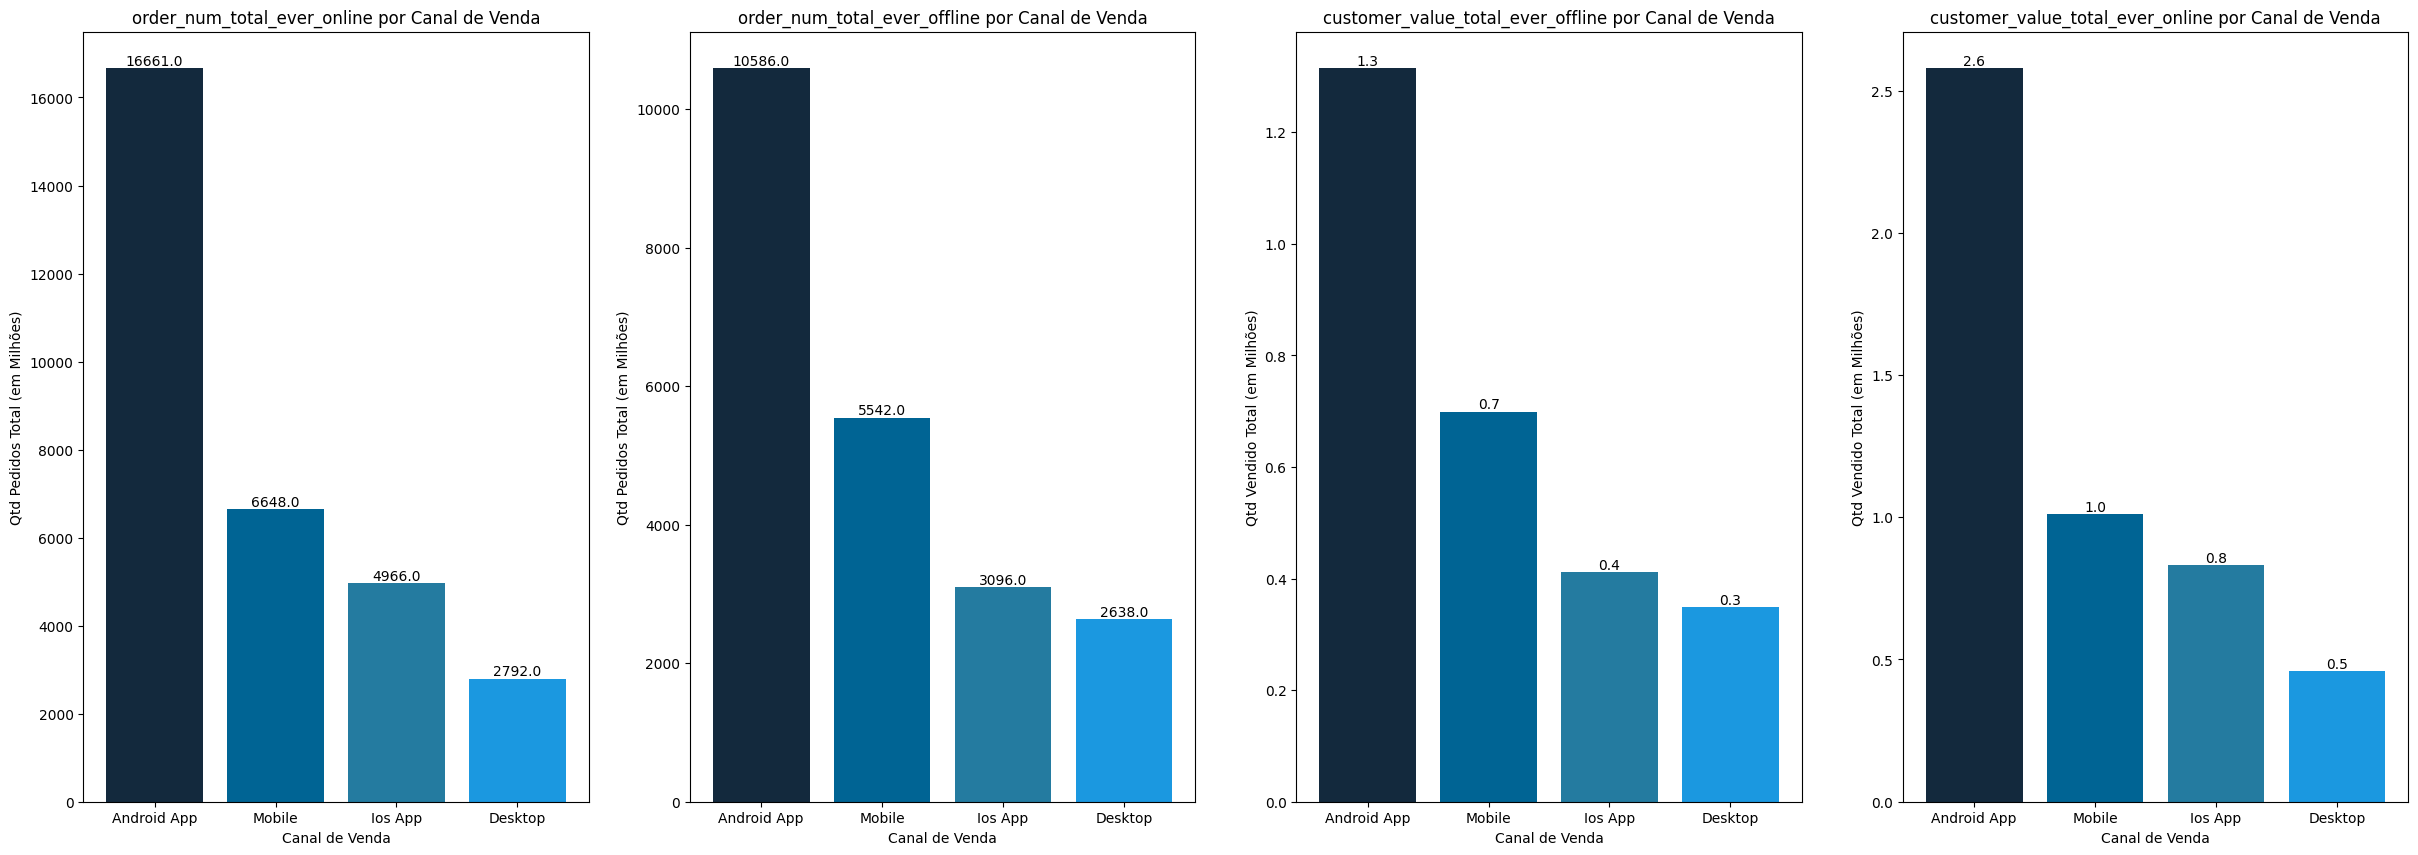

In [600]:
# Cria uma visualização de acordo com a tabela acima
grafico_categorico_canal(
    resumo_canal.index,
    resumo_canal,
    ['Qtd Pedidos', 'Qtd Pedidos', 'Qtd Vendido', 'Qtd Vendido']
)

Aqui vemos que os Clientes fazem mais pedidos tanto online quanto offline representam o maior volume e participação no faturamento e na quantidade de pedidos, sem seguida o Desktop.

Embora existam pedidos realizados offline, nenhum cliente é cadastrado de fato nesse canal, mas o offline tem um bom volume de faturamento, teria que verificar o porquê os clientes online compram offline, se é algum problema interno ou se o cadastro está certo.

In [601]:
# Cria lista como o nome das colunas para análise
coluna_resumo_leadtime_clientes = ['order_channel', 'leadtime_clientes']
# Cria uma tabela agrupada por tempo de empresa fazendo a soma dos valores numéricos (float)
resumo_leadtime_clientes = purchase_list_sem_outlier[coluna_resumo_leadtime_clientes].groupby(['order_channel']).mean()
resumo_leadtime_clientes

,leadtime_clientes
order_channel,
Android App,472.907949
Desktop,560.873439
Ios App,461.420235
Mobile,514.095442


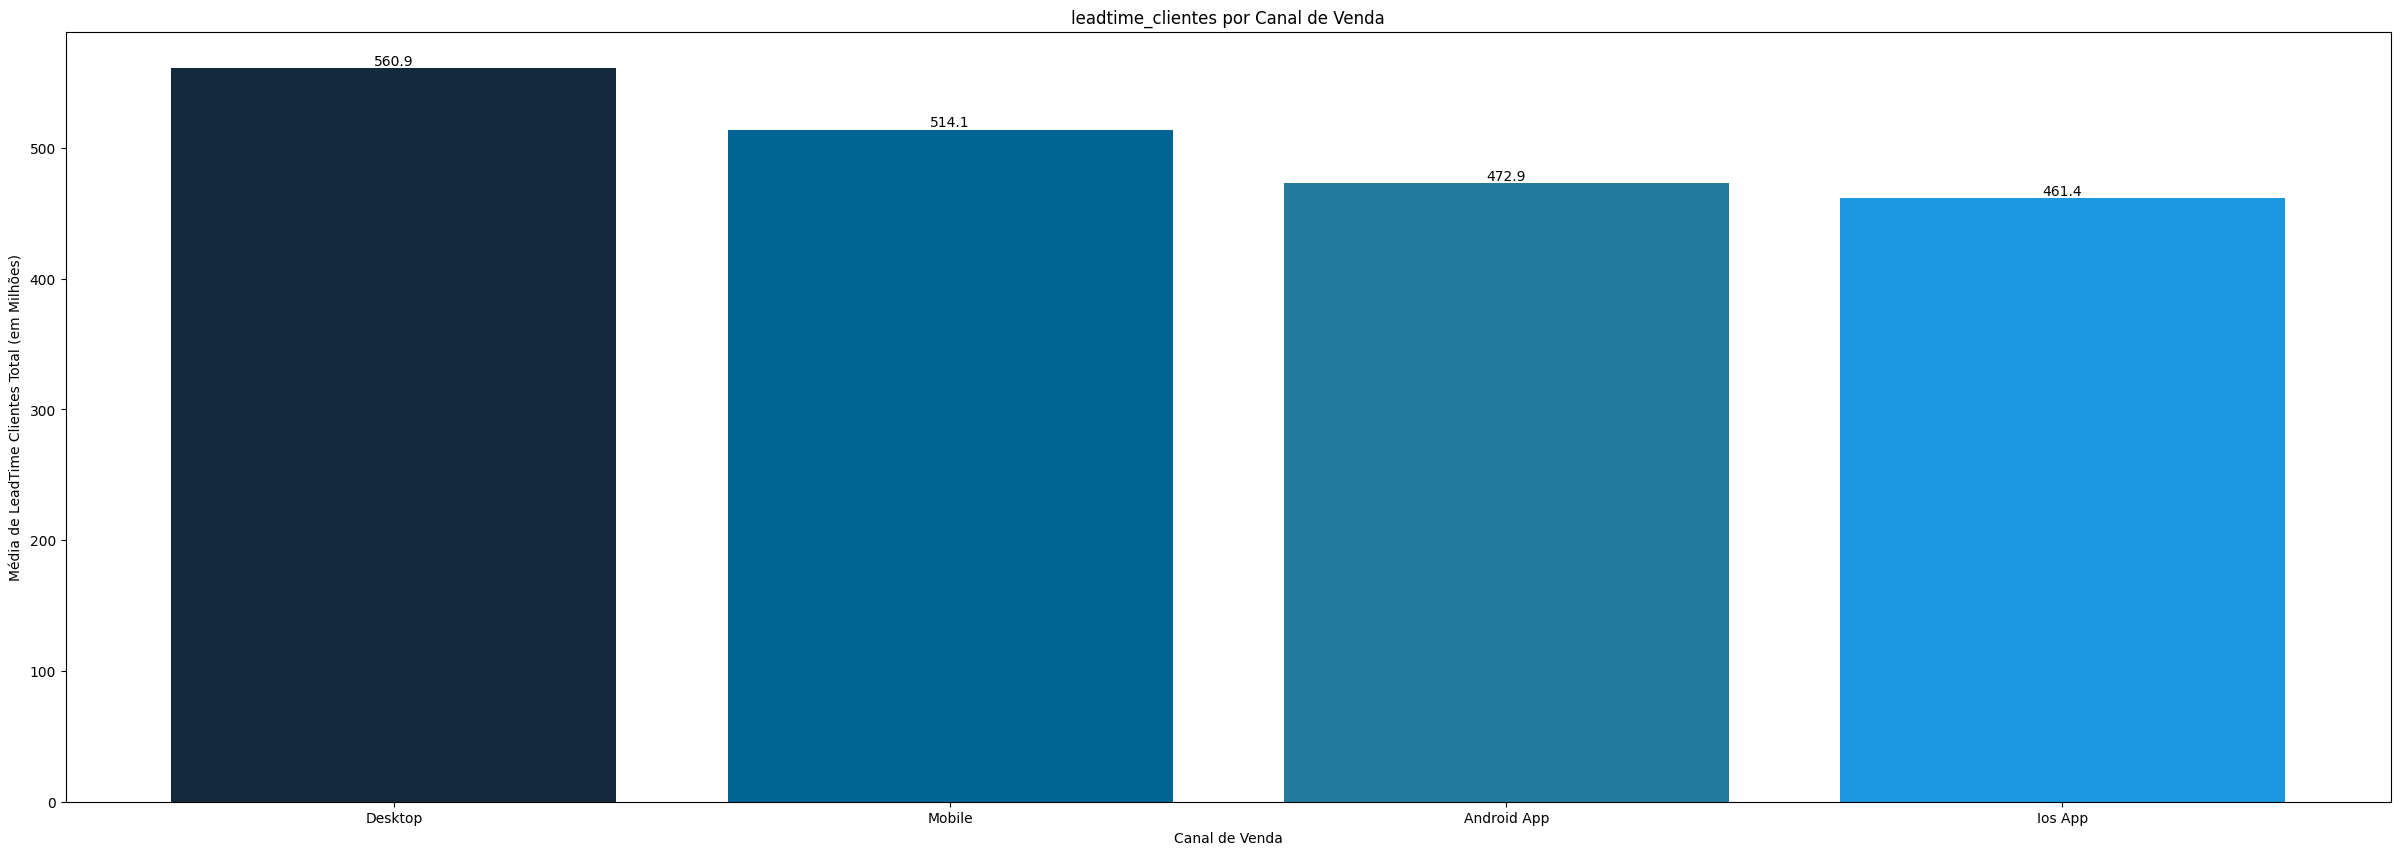

In [602]:
# Cria uma visualização de acordo com a tabela acima
grafico_categorico_canal(
    resumo_leadtime_clientes.index,
    resumo_leadtime_clientes,
    ['Média de LeadTime Clientes']
)

In [571]:
# Cria uma tabela agrupada por order_channel fazendo a contagem dos valores
resumo_canal_cliente = purchase_list_sem_outlier.groupby(['order_channel'])['order_channel'].count()
resumo_canal_cliente = pd.DataFrame(resumo_canal_cliente)
resumo_canal_cliente

,order_channel
order_channel,
Android App,7083
Desktop,1762
Ios App,2125
Mobile,3730


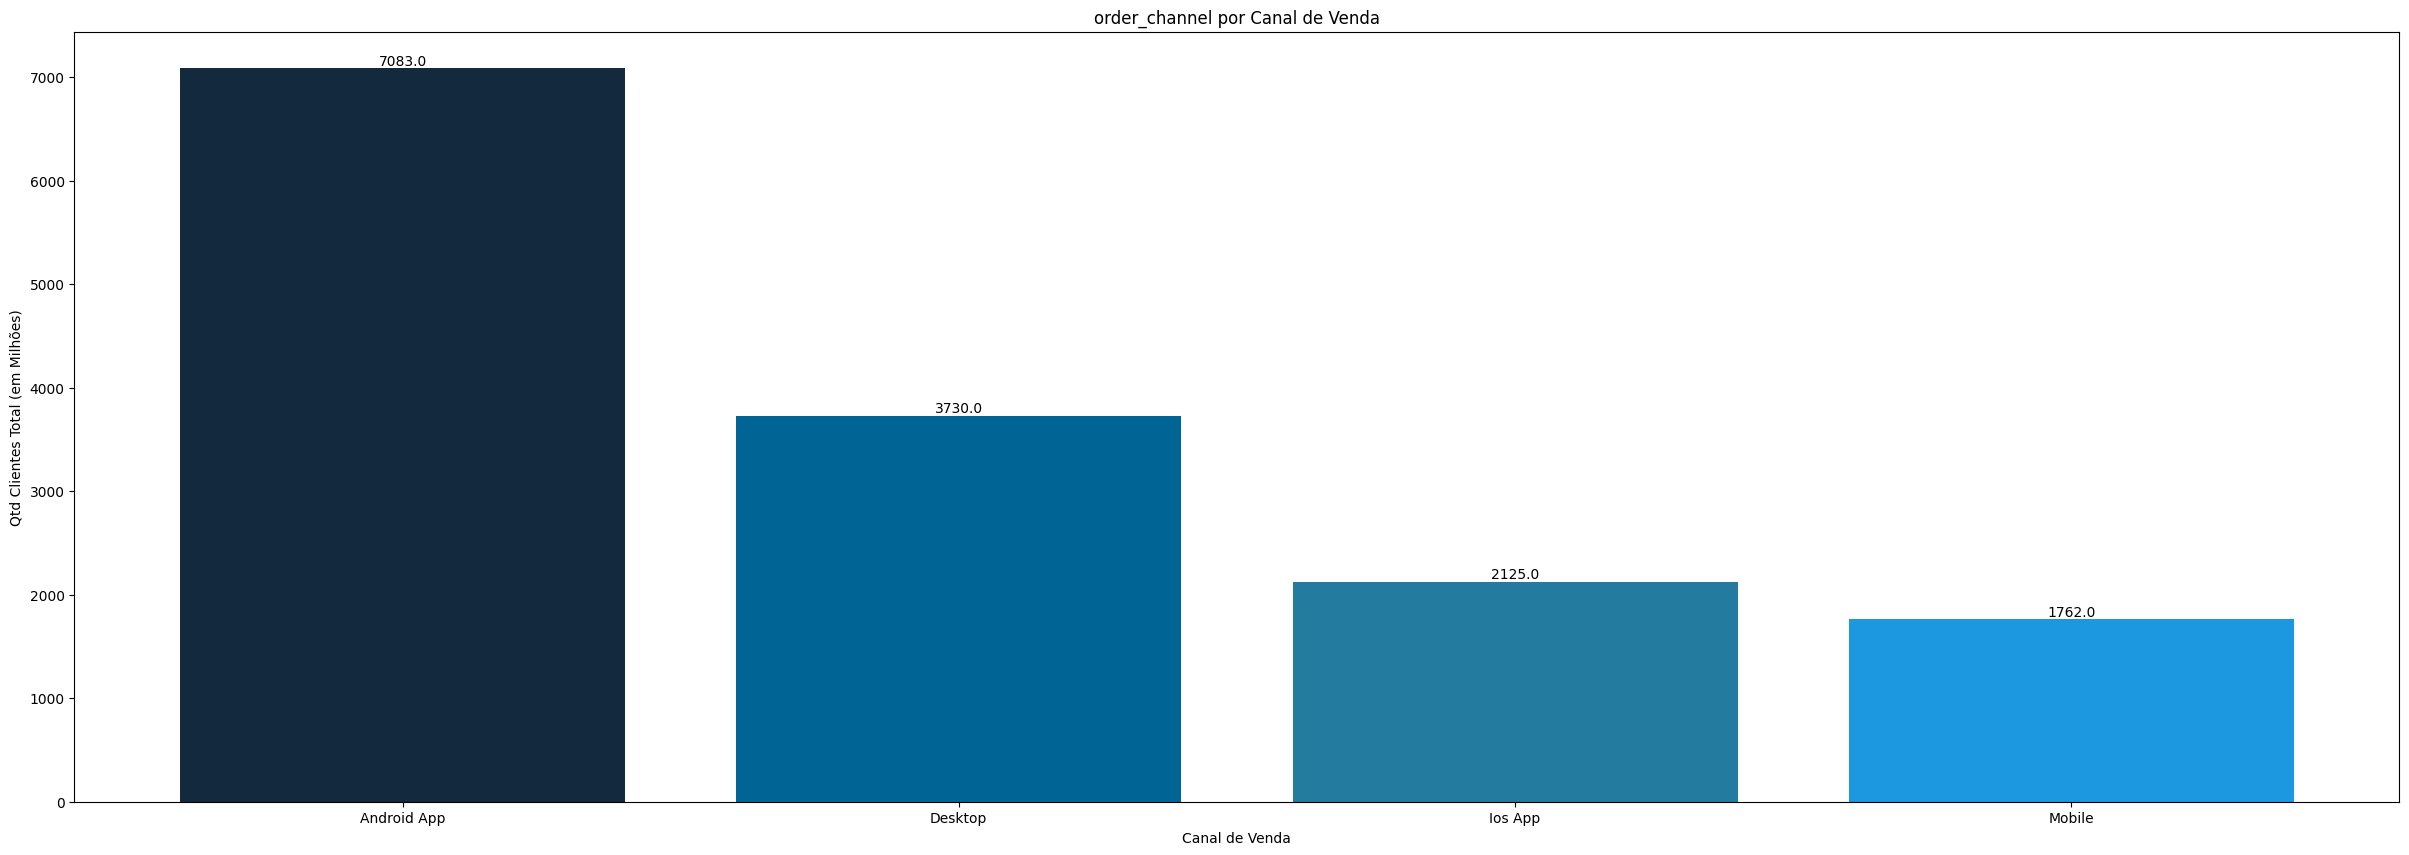

In [572]:
# Cria uma visualização de acordo com a tabela acima
grafico_categorico_canal(
    resumo_canal_cliente.index,
    resumo_canal_cliente,
    ['Qtd Clientes']
)

In [604]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(purchase_list_sem_outlier[coluna])
rescaledX

array([[ 1.23788768, -0.71874688, -0.37993574,  1.80646312, -1.35341925],
       [ 0.58173981,  0.75648059,  0.01021665,  0.24509327, -0.45776872],
       [-0.73055593, -0.71874688, -1.16055274, -0.96592192, -1.74503972],
       ...,
       [-0.73055593, -0.71874688, -0.29804901, -0.35529387, -0.7115968 ],
       [-0.07440806, -0.71874688, -0.3800138 ,  0.62230613,  0.46689074],
       [-0.73055593, -0.71874688, -1.16055274, -0.42489333, -0.780493  ]])

In [614]:
# Dummietizando a variável categórica
encoded_X = OneHotEncoder().fit_transform(purchase_list_sem_outlier[['order_channel']])
encoded_X[:]

<14700x4 sparse matrix of type '<class 'numpy.float64'>'
	with 14700 stored elements in Compressed Sparse Row format>